
#### ReadME
I am using PyTorch library to build a neural network to classify images of clothing Fashion-Mnist.  
About the dataset- There 28 * 28 pixels images of clothing. There are 10 types of clothes. 

I build a model_0 class with linear parameters, calulated loss over it.
then build a class with non linear parameters, calculated its loss
then A CNN


i build a model_1 with non linear parameter .
optimizer as- 
loss function as - 
number of epochs - 


I build model_2 CNN model based on TinyVGG architecture
Using CNN -build 2 cnn block layer , a clasifier layer.
Used SGD optimzer , and CrossEntropyLoss function  

CNN architecture is based on Tiny VGG. Tiny VGG is a convolutional neural network architecture that is based on the VGG network architecture. The VGG architecture was developed by researchers at the Visual Geometry Group (VGG) at the University of Oxford, and it achieved state-of-the-art results on a number of computer vision tasks, such as image classification and object detection.

### 0.Computer vision libraries in PyTorch

In [1]:
# import libraries
import torch
from torch import nn #nn is subpackage that provides tool tool to build neural network

import torchvision   #contains 1.datasets, 2.models,3. image transformations to be used in cv problems
from torchvision import datasets
from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader

from matplotlib import pyplot as plt

!pip install torchmetrics
import torchmetrics

from tqdm.auto import tqdm  #creates a progress bar for iterarable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 3.6 MB/s eta 0:00:00


### 1.Getting the fashion MNIST dataset

In [2]:
from torchvision.datasets.mnist import FashionMNIST
# setting training data
train_data = datasets.FashionMNIST(root ='/content/drive/Othercomputers/My Laptop/Workspace/Projects/cv-pytorch/data',
                                   train = True,# if I want train dataset
                                   download = True,
                                   transform = ToTensor(), #the image is in PIL format, ToTensor converts to tensor
                                   target_transform=None #option to transform labels
                                   )





#setting testing data

test_data = datasets.FashionMNIST('/content/drive/Othercomputers/My Laptop/Workspace/Projects/cv-pytorch/data',
                                  train = False,  #to download test data
                                  download =True,
                                  transform= ToTensor(),
                                  )

In [3]:
# see the training sample, see its shape

train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /content/drive/Othercomputers/My Laptop/Workspace/Projects/cv-pytorch/data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /content/drive/Othercomputers/My Laptop/Workspace/Projects/cv-pytorch/data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
type(train_data)


torchvision.datasets.mnist.FashionMNIST

In [6]:
type(train_data[0])  #so it returns a tuple, 2values one is dataa and other is label

tuple

In [7]:
image, label = train_data[0]

In [8]:
image.shape  #28*28 pixels

torch.Size([1, 28, 28])

In [9]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [10]:
label   # so this is 10 class or 10th label 

9

#### 1.1 Input and output shapes of computer vision model

In [11]:
#the first image and its label:
image, label = train_data[0]

In [12]:
# image has a shape of:
image.shape
# 1,28,28 the image is of 28*28 pixels

torch.Size([1, 28, 28])

More specificially: current tensor oder is   CHW-color,height, width
[1= color_channels, 28 =height , 28 =width ]
HWC - height,width and color is another kind of order 

NCHW - N-number of images, C-color channel, H-height , W-width

color_channel = 1 means the image is a grayscale

color_channel = 3 means the image is RGB- red,green, blue

In [13]:
# the label is and integer that denotes the class of the image
type(label)

int

In [14]:
#number of elements

len(train_data.data), len(train_data.classes), len(test_data.data), len(test_data.classes)

(60000, 10, 10000, 10)

In [15]:
train_data.targets  # all the targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [16]:
train_data.classes  # the classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

#### 1.2 Visualize the data

Shape of image: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

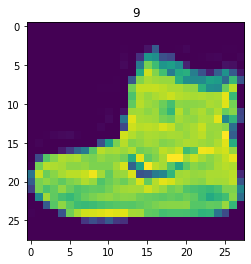

In [17]:
image, label = train_data[0]  #return a tuple stores in image and label
print(f"Shape of image: {image.shape}")

plt.imshow(image.squeeze()) #imshow-Display data as an image, i.e., on a 2D regular raster.
                            #The input may either be actual RGB(A) data, or 2D scalar data, which will be rendered as a pseudocolor image.         
                            #For displaying a grayscale image set up the colormapping using the parameters cmap='gray', vmin=0, vmax=255.
plt.title(label)


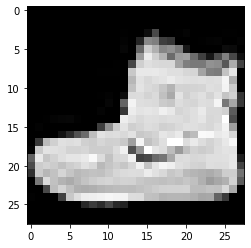

In [18]:

plt.imshow(image.squeeze(),cmap="gray")

### 2.Prepare the data loader

The data loader helps in loading the data to the model.  
Sets the large dataset into smaller chunks.Smaller chunks are known as **batch size**.  
- Smaller chunks of data the model are computationally more efficient
- More chances for the model to improve.With mini-batches (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).


In [19]:

BATCH_SIZE = 32

# turn the train data into iterables

train_dataloader = DataLoader(train_data,           
                          batch_size = BATCH_SIZE,  #number of sample per batch
                          shuffle = True,    # shuffle every epoch
                          )

#turn the test data into iterables

test_dataloader  = DataLoader(test_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

In [20]:
train_dataloader, test_dataloader

print(f"Length of train data loader :{len(train_dataloader)} and the batch size of {BATCH_SIZE} ")

print(f"Length of test data loader:{len(test_dataloader)} and the beach size of{BATCH_SIZE}")

Length of train data loader :1875 and the batch size of 32 
Length of test data loader:313 and the beach size of32


In [21]:
#seeing whats inside the data laoder
train_features_batch,train_labels_batch = next(iter(train_dataloader))

In [22]:
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [23]:
train_features_batch[0].shape

torch.Size([1, 28, 28])

### 3.Baseline Model


Since we are dealing with image we will use of Flatten() function  
This compresses the dimensions of the image into a single vector


In [24]:
flatten_fn = nn.Flatten() #all nn functions act as models

x = train_features_batch[0] #taking the first image

flatten_image = flatten_fn(x)  #applying flatten function

print(f"shape before flatten:{x.shape} -> [color_channel,height, width]")

print(f"shape after flatten:{flatten_image.shape})->[color_channel, height*width]")

shape before flatten:torch.Size([1, 28, 28]) -> [color_channel,height, width]
shape after flatten:torch.Size([1, 784]))->[color_channel, height*width]


Flatten() prodcues a feature vector by converting width,height into one, this is called a feature vector.
Linear() layer like the input to be in feature vector form

In [25]:
#baseline model class
class FashionModelV0(nn.Module):  #all classes inherit Module class
  def __init__(self,input_shape:int,hidden_unit:int,output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features =input_shape,out_features=hidden_unit),
        nn.Linear(in_features=hidden_unit,out_features=output_shape))
    
  def forward(self,x):
    
    return self.layer_stack(x)
    
    


Baseline model is prepared. 
I will create an intance of the baseline model by providing it with the hyperparameters.
- input_shape = 784 , our image is of shape 28*28 ,784
- hidden-_layer =10 , number of hiddent units we want
- output_shape = number of classes in our data

In [26]:
model_0 = FashionModelV0(input_shape = 784,
                         hidden_unit = 10,
                         output_shape = 10).to('cpu')

In [27]:
model_0(image)

tensor([[ 0.0095, -0.0819, -0.0301, -0.2534, -0.1860,  0.0151, -0.3778, -0.1901,
         -0.2348,  0.2589]], grad_fn=<AddmmBackward0>)

### 3.1 Set up accuracy, optimzer and loss function

In [28]:
accuracy_fn = torchmetrics.Accuracy(task='multilabel',num_labels=10)  #torchmetric class 

In [29]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [30]:
from  helper_functions import accuracy_fn

In [31]:
optimizer = torch.optim.SGD(model_0.parameters(),lr=0.1)


In [32]:
loss_fn = nn.CrossEntropyLoss()

### 3.2 Create a function to time our model

In [33]:
from timeit import default_timer as timer

In [34]:
def print_train_time(start:float, end:float, device=None):
  total_time = end-start
  print(f"Total time on {device} is : {total_time:.3f} seconds")
  return total_time

### 3.3 Train and testing of our model class

We are training in batches so everthing like accuracy, loss, computing will be on batches

One epoch represents the number of samples is passed once through the forward pass.  
With batches 

In [38]:
#set seed
torch.manual_seed(1)

#timer
train_start_time = timer()

#small epochs we will train on cpu
epochs =3

for epoch in tqdm(range(epochs)):
  train_loss = 0

  print(f"epoch{epoch}\n------------")
  #training
  for batch,(X,y) in enumerate(train_dataloader):

    #train mode
    model_0.train()

    #forward pass per batch
    y_pred = model_0(X)   #shape of y is [32,10]
    

    #calaculate loss per batch
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumulating the loss

    #optimzer zero
    optimizer.zero_grad()

    #loss
    loss.backward()

    #step
    optimizer.step()

    #see the number of samples seen
    if batch % 400 == 0:
      print(f"number of samples seen:{batch*len(X)}/{len(train_dataloader.dataset)}")

    #average loss per bathc per epoch

  train_loss = train_loss/len(train_dataloader)

  ##Testing
  #setup variale for accumulating adding loss , accuracy

  test_loss = 0
  test_accuracy =0 


  #eval moode
  model_0.eval()
  #inference mode
  with torch.inference_mode():
    for X,y in test_dataloader:
  
      #forward pass
      test_pred = model_0(X)


      #calculate losss
      test_loss += loss_fn(test_pred,y)


      #calculate accuracy
      
      test_accuracy += accuracy_fn(y,test_pred.argmax(dim=1))


  #divide total test loss by lenght of test dtaloader
  test_loss = test_loss/len(test_dataloader)


  #divide total accuracy by length of test dataloader
  test_accuracy= test_accuracy/len(test_dataloader)


  #print the losses
  print(f"training loss:{train_loss:.4f} |  testing loss:{test_loss:.4f}  | test accuracy:{test_accuracy:.4f}")



#calculate traiing time
train_end_time = timer()

total_time_on_cpu = print_train_time(train_start_time,train_end_time)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch0
------------
number of samples seen:0/60000
number of samples seen:12800/60000
number of samples seen:25600/60000
number of samples seen:38400/60000
number of samples seen:51200/60000
training loss:0.4429 |  testing loss:0.4664  | test accuracy:83.6861
epoch1
------------
number of samples seen:0/60000
number of samples seen:12800/60000
number of samples seen:25600/60000
number of samples seen:38400/60000
number of samples seen:51200/60000
training loss:0.4371 |  testing loss:0.5127  | test accuracy:81.0304
epoch2
------------
number of samples seen:0/60000
number of samples seen:12800/60000
number of samples seen:25600/60000
number of samples seen:38400/60000
number of samples seen:51200/60000
training loss:0.4303 |  testing loss:0.4715  | test accuracy:83.3966
Total time on None is : 25.481 seconds


### 4.Make predictions and getting model 0 results

Create a function that will take a model instance, Dataloader , loss function and accuracy function object and returns the returns the models output - loss and accuracy

In [39]:
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn,
               device:torch.device=device):
  loss,acc =0,0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X = X.to(device)
      y= y.to(device)
      #make predictions with mode
      y_pred = model(X)

      #Accumulate loss and accuracy ber batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))

    #scale loss and acc to funf average loss/acc per batch
    loss /=len(data_loader)
    acc /= len(data_loader)

  return{"model name":model.__class__.__name__,
         "model_loss": loss.item(),
         "model_acc": acc}

    
model_0_resullts = eval_model(model = model_0,data_loader = test_dataloader,
                              loss_fn = loss_fn, accuracy_fn=accuracy_fn)


  
model_0_resullts 
               

{'model name': 'FashionModelV0',
 'model_loss': 0.47200343012809753,
 'model_acc': 83.38658146964856}

### 5.Set up device agnostic code

The time to run a model depends on the processor. GPU has more computaional power and hence takes less time. 
We setp up device agnostic code to set device as 'cuda' if it available. This saves us from errors. The model will run on 'cpu' which is always available

In [40]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [41]:
device

'cuda'

### 6.Creating a model with non linearity

In [42]:
# Create a model with non-linear and linear layers
class FashionModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [43]:
#creating an object

model_1 = FashionModelV1(input_shape=784,
                         hidden_units=10,
                         output_shape = 10).to(device)

next(model_1.parameters()).device

#input shape - 28*28 =784 this is as per the image size
#output_shape = 10 - number of output classes desired

device(type='cuda', index=0)

#### 6.1 Set up loss, optimizer and evaluation

In [44]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)


#### 6.2 Training and testing loop

Create a function to perform training loop.

In [45]:
train_data

train_dataloader  = DataLoader(train_data,batch_size=32,shuffle = True)
test_dataloader = DataLoader(test_data,batch_size=32,shuffle=True)

In [46]:
train_features_batch,train_labels_batch = next(iter(train_dataloader))

In [47]:
train_features_batch.shape

torch.Size([32, 1, 28, 28])

In [48]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [49]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.26795 | Train accuracy: 55.92%
Test loss: 1.15317 | Test accuracy: 58.50%

Epoch: 1
---------
Train loss: 1.14580 | Train accuracy: 58.82%
Test loss: 1.18108 | Test accuracy: 57.76%

Epoch: 2
---------
Train loss: 1.11803 | Train accuracy: 59.39%
Test loss: 1.15917 | Test accuracy: 58.20%

Total time on cuda is : 28.933 seconds


In [50]:
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device
                             )

### 7.Building a Convolutional Neural Network CNN

In [51]:
# making a convolutional neural network

class FashionModelV2(nn.Module):
  """
  Model architecture
  https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),


        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels= hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),

        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3,
                     stride=1),

    )            

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride = 1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride =1 ,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size =3)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*8*8,
                  out_features=output_shape)
    )

  def forward(self,x:torch.Tensor):

    x = self.conv_block_1(x)
    # print(f"output of block_1 :{x.shape}")
    
    x=self.conv_block_2(x)
    # print(f"output of block_2:{x.shape}")

    x=self.classifier(x)
    # print(f"output of classifier:{x.shape}")

    return x


model_2 = FashionModelV2(input_shape=1,
                         hidden_units =10,
                         output_shape=10).to(device)
        
        
model_2




FashionModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=640, out_features=10, bias=True)
  )
)

In [52]:
image.shape

torch.Size([1, 28, 28])

In [53]:
image = image.to(device)

In [55]:
model_2(image)

RuntimeError: ignored

**The rule of matrix multiplication is the inner dimensions should match.**

#### 7.1 Understanding 'Conv2d()'

Convoluting over the fixed filter size. 

convolution layers learns most important features of the input.  
Max pool layers compresses the learnt features further.

input_channels = number of channels of input image
output_channels = number of channels produced by the convolution
kernel_size  = size of the convolving kernel/filter,convolution is applied to this 
stride - how big a step convolving kernel takes at a time
paddin


kernel - a filter to the image to which convolution is applied. This filter moves and it step are decided by 'strides' 

In [56]:
#create data similar to https://poloclub.github.io/cnn-explainer/

In [57]:
#create a batch of images
images = torch.randn(size=(31,3,64,64)) #31 images, 3 colour channels, 64 widh,64 height

test_image = images[0]

print(f"image batch shape:{images.shape}")
print(f"single image shape:{test_image.shape}")
print(f"test iamge")

image batch shape:torch.Size([31, 3, 64, 64])
single image shape:torch.Size([3, 64, 64])
test iamge


In [58]:
test_image.shape

torch.Size([3, 64, 64])

In [59]:
# create a single conv2d layer

conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=(2,2),
                      stride=2,
                      padding=1) #the in channels is equivalent to the colour channels in the images, we have 3 color channels in our practivce data,test_iamge

In [60]:
conv_output = conv_layer(test_image)

In [61]:
test_image.shape

torch.Size([3, 64, 64])

In [62]:
conv_output.shape

torch.Size([10, 33, 33])

#### 7.2 Understanding 'MaxPool2d()'

Taking max of the window

In [63]:
test_image.shape

torch.Size([3, 64, 64])

In [64]:
print(f"test image original shape{test_image.shape}")

test image original shapetorch.Size([3, 64, 64])


In [65]:
#create a maxpool2d layer

max_pool_layer = nn.MaxPool2d(kernel_size=1)

In [66]:
max_pool_output = max_pool_layer(test_image)

In [67]:
max_pool_output.shape

torch.Size([3, 64, 64])

#### 7.3 Setup loss function and optimizer for model_2


In [68]:
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.01)

loss_fn = nn.CrossEntropyLoss()

from helper_functions import accuracy_fn

#### Train and test step


In [69]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_start_time_model_2 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):

  print("eppch:{epoch}----------")
  train_step(model_2,data_loader =train_dataloader,loss_fn =loss_fn,
            optimizer=optimizer,accuracy_fn=accuracy_fn,
            device = device)
  
  test_step(model =model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device
            )
  
timer_end = timer()
time_ = print_train_time(start = train_start_time_model_2,
                         end = timer_end,
                         device =device)

  0%|          | 0/3 [00:00<?, ?it/s]

eppch:{epoch}----------
Train loss: 1.24694 | Train accuracy: 53.84%
Test loss: 0.69014 | Test accuracy: 74.51%

eppch:{epoch}----------
Train loss: 0.60268 | Train accuracy: 77.78%
Test loss: 0.54499 | Test accuracy: 79.40%

eppch:{epoch}----------
Train loss: 0.47777 | Train accuracy: 82.44%
Test loss: 0.45982 | Test accuracy: 83.41%

Total time on cuda is : 37.356 seconds


In [70]:
model_2_results = eval_model(model=model_2,
           data_loader=test_dataloader,
           loss_fn=loss_fn,
           accuracy_fn=accuracy_fn,
           )

### 8.Compare models

In [71]:
import pandas as pd

results = pd.DataFrame([model_0_resullts,model_1_results,model_2_results])

In [72]:
results

,model name,model_loss,model_acc
0,FashionModelV0,0.472003,83.386581
1,FashionModelV1,1.159101,58.206869
2,FashionModelV2,0.458962,83.446486


### 9.Make random predictions

In [109]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [110]:
class_names = train_data.classes

In [111]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [116]:
#making prediction probabilites

pred_probs = make_predictions(model = model_2,
                              data = test_samples,
                              )

In [117]:
pred_probs

tensor([[1.0228e-06, 7.6825e-08, 1.3696e-06, 2.8880e-06, 2.5382e-06, 9.5234e-01,
         7.4775e-07, 3.4699e-04, 1.3021e-04, 4.7177e-02],
        [9.5379e-04, 9.8502e-01, 1.0448e-05, 1.0718e-02, 2.7478e-03, 1.7655e-06,
         4.7998e-04, 1.1916e-05, 5.6502e-05, 1.6468e-06],
        [4.4143e-06, 4.1493e-08, 1.5625e-06, 8.4743e-06, 2.7430e-06, 4.9740e-03,
         3.1383e-06, 8.6179e-01, 8.4206e-04, 1.3238e-01],
        [3.6360e-03, 6.5772e-04, 5.0908e-01, 3.1753e-03, 4.5231e-01, 2.4712e-06,
         2.1074e-02, 2.0564e-06, 1.0059e-02, 5.0506e-07],
        [2.4336e-02, 4.0060e-03, 9.7334e-04, 9.6880e-01, 4.8954e-04, 9.4027e-08,
         1.2857e-03, 1.1721e-05, 3.0850e-05, 6.7552e-05],
        [7.2728e-01, 5.7131e-04, 2.5721e-03, 1.2173e-02, 6.0427e-03, 7.3057e-09,
         2.5113e-01, 7.7127e-07, 2.2506e-04, 1.7169e-07],
        [2.4566e-04, 6.8417e-04, 9.4792e-02, 1.2844e-05, 8.4692e-01, 2.2013e-07,
         5.7215e-02, 2.2247e-09, 1.3295e-04, 1.6336e-08],
        [4.0386e-06, 2.8146

In [118]:
# now will we take argmax of the prediction probabilites

pred_probs = pred_probs.argmax(dim=1)

In [119]:
pred_probs

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

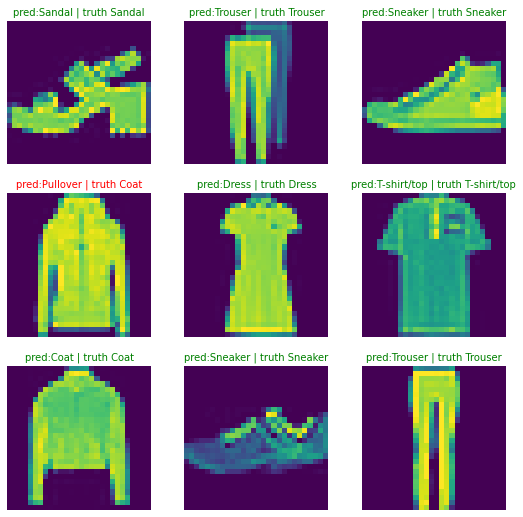

In [123]:
# plot predictions

plt.figure(figsize=(9,9))
nrows = 3
ncols =3

for i,sample in enumerate(test_samples):
  #the index
  plt.subplot(nrows,ncols,i+1)

  plt.imshow(sample.squeeze())

  pred_label = class_names[pred_probs[i]]

  truth_label = class_names[test_labels[i]]

  title_text = f"pred:{pred_label} | truth {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text,fontsize=10, c='g')  #green when correct
  else:
    plt.title(title_text,fontsize=10,c='r')

  plt.axis(False) 




### 10. Make confusion matrix

In [125]:
from torch.autograd.grad_mode import inference_mode
y_preds = []
model_2.eval()
with torch.inference_mode():

  for X,y in tqdm(test_dataloader,desc="Making predictions"):
    #send data to target device
    X,y = X.to(device), y.to(device)


    #do a forward pass
    y_logits = model_2(X)

    #turn predictions from logit->prediction prob->prediction labels
    y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

    #put prediction on cpu for evalutaion
    y_preds.append(y_pred.cpu())

#concatenate list of tensors into tensor
y_pred_tensor = torch.cat(y_preds)



Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [131]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.14.0
mlxtend version: 0.14.0


In [129]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.14.0


AssertionError: ignored

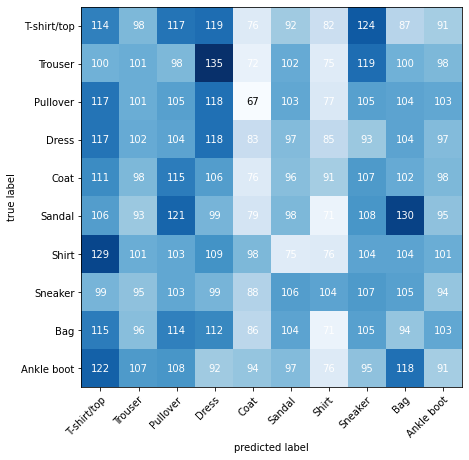

In [132]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);